In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
from scipy.stats import binomtest
from pard.grantham import grantham
import seaborn as sns

In [218]:
nnn_table = {'TTT': 'F', 'TCT': 'S', 'TAT': 'Y', 'TGT': 'C', 'TTC': 'F', 'TCC': 'S', 'TAC': 'Y', 'TGC': 'C',
                 'TTA': 'L',
                 'TCA': 'S', 'TAA': '*', 'TGA': '*', 'TTG': 'L', 'TCG': 'S', 'TAG': '*', 'TGG': 'W', 'CTT': 'L',
                 'CCT': 'P',
                 'CAT': 'H', 'CGT': 'R', 'CTC': 'L', 'CCC': 'P', 'CAC': 'H', 'CGC': 'R', 'CTA': 'L', 'CCA': 'P',
                 'CAA': 'Q',
                 'CGA': 'R', 'CTG': 'L', 'CCG': 'P', 'CAG': 'Q', 'CGG': 'R', 'ATT': 'I', 'ACT': 'T', 'AAT': 'N',
                 'AGT': 'S',
                 'ATC': 'I', 'ACC': 'T', 'AAC': 'N', 'AGC': 'S', 'ATA': 'I', 'ACA': 'T', 'AAA': 'K', 'AGA': 'R',
                 'ATG': 'M',
                 'ACG': 'T', 'AAG': 'K', 'AGG': 'R', 'GTT': 'V', 'GCT': 'A', 'GAT': 'D', 'GGT': 'G', 'GTC': 'V',
                 'GCC': 'A',
                 'GAC': 'D', 'GGC': 'G', 'GTA': 'V', 'GCA': 'A', 'GAA': 'E', 'GGA': 'G', 'GTG': 'V', 'GCG': 'A',
                 'GAG': 'E',
                 'GGG': 'G'}

In [219]:
color_mapping12 = {
    "C>A": "deepskyblue",
    "G>T": "deepskyblue",
    "C>G": "black",
    "G>C": "black",
    "C>T": "red",
    "G>A": "red",
    "T>A": "silver",
    "A>T": "silver",
    "T>C": "yellowgreen",
    "A>G": "yellowgreen",
    "T>G": "pink",
    "A>C": "pink",
}
#sbs12_ordered = ["C>A", "G>T", "C>G", "G>C", "C>T", "G>A", "T>A", "A>T", "T>C", "A>G", "T>G", "A>C"]
sbs12_ordered = ["A>C", "A>G", "A>T", "C>A", "C>G", "C>T", "G>A", "G>C", "G>T", "T>A", "T>C", "T>G"]
colors12 = [color_mapping12[sbs] for sbs in sbs12_ordered]

In [220]:
df = pd.read_csv('../data/All_mutation_information.csv.gz')

C:\Users\voron\AppData\Local\Temp\ipykernel_4012\3160139400.py:1: DtypeWarning: Columns (13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/All_mutation_information.csv.gz')


In [221]:
df.head()

,mutID,type,status 1,status 2,position in refseq (one_based),position_in_msa0117_alignment (start),position_in_msa0117_alignment (end),"(SBS) codon_position (0=noncoding, 1-3:position in triplet)",base(s) in status 1,base(s) in status 2,(SBS) mutation in sequence context,(SBS) gene,(SBS) AA change,(SBS) is coding,(SBS) is nonsynonymous,(SBS) is stopgain,(MBS/Indel) with flaking sequences in status 1,(MBS/Indel) with flaking sequences in status 2,(Indel) ins or del,(Indel) frame
0,sbs_10_TT>GT_633183_329639,SBS,node281658,hCoV-19/USA/LA-EVTL071/2020|EPI_ISL_451232|202...,10.0,122,122,0.0,T,G,TT>GT,5'UTR,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
1,sbs_11_TT>CA_357288_6016,SBS,node5763,hCoV-19/USA/UT-UPHL-2012146142/2020|EPI_ISL_74...,11.0,123,123,0.0,T,C,TT>CA,5'UTR,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
2,sbs_13_AT>AA_649653_348274,SBS,node298128,hCoV-19/USA/CA-CSMC203/2020|EPI_ISL_824612|202...,13.0,125,125,0.0,T,A,AT>AA,5'UTR,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
3,sbs_13_AT>CA_631201_327314,SBS,node279676,hCoV-19/USA/LA-EVTL1196/2020|EPI_ISL_768465|20...,13.0,125,125,0.0,T,C,AT>CA,5'UTR,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
4,sbs_13_AT>CA_611678_611679,SBS,node260153,node260154,13.0,125,125,0.0,T,C,AT>CA,5'UTR,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
ns_mut_df = df[df['(SBS) is nonsynonymous'].isin(['TRUE', 'True'])]
ns_mut_df = ns_mut_df[ns_mut_df['base(s) in status 1'].isin(['A', 'T', 'G', 'C']) & ns_mut_df['base(s) in status 2'].isin(['A', 'T', 'G', 'C'])]

In [223]:
ns_mut_df = ns_mut_df[ns_mut_df['(SBS) codon_position (0=noncoding, 1-3:position in triplet)'] == 2]

In [224]:
ns_mut_df.head()

,mutID,type,status 1,status 2,position in refseq (one_based),position_in_msa0117_alignment (start),position_in_msa0117_alignment (end),"(SBS) codon_position (0=noncoding, 1-3:position in triplet)",base(s) in status 1,base(s) in status 2,(SBS) mutation in sequence context,(SBS) gene,(SBS) AA change,(SBS) is coding,(SBS) is nonsynonymous,(SBS) is stopgain,(MBS/Indel) with flaking sequences in status 1,(MBS/Indel) with flaking sequences in status 2,(Indel) ins or del,(Indel) frame
98838,sbs_11085_TA>TT_603629_603630,SBS,node252104,node252105,11085.0,11896,11896,2.0,A,T,TA>TT,ORF1ab_nsp6,ORF1ab Y3607F,TRUE,TRUE,FALSE,NaN,NaN,NaN,NaN
98839,sbs_11085_TA>GT_586250_586251,SBS,node234725,node234726,11085.0,11896,11896,2.0,A,G,TA>GT,ORF1ab_nsp6,ORF1ab Y3607C,TRUE,TRUE,FALSE,NaN,NaN,NaN,NaN
98840,sbs_11085_TA>GT_586900_277703,SBS,node235375,hCoV-19/England/CAMC-B78949/2020|EPI_ISL_66789...,11085.0,11896,11896,2.0,A,G,TA>GT,ORF1ab_nsp6,ORF1ab Y3607C,TRUE,TRUE,FALSE,NaN,NaN,NaN,NaN
98841,sbs_11085_TA>TT_587680_278605,SBS,node236155,hCoV-19/England/MILK-B554C9/2020|EPI_ISL_65792...,11085.0,11896,11896,2.0,A,T,TA>TT,ORF1ab_nsp6,ORF1ab Y3607F,TRUE,TRUE,FALSE,NaN,NaN,NaN,NaN
98842,sbs_11085_TA>CT_513754_191816,SBS,node162229,hCoV-19/Brazil/PE-IAM171/2020|EPI_ISL_500867|2...,11085.0,11896,11896,2.0,A,C,TA>CT,ORF1ab_nsp6,ORF1ab Y3607S,TRUE,TRUE,FALSE,NaN,NaN,NaN,NaN


In [225]:
ns_mut_df['codon_from'] = ns_mut_df['(SBS) mutation in sequence context'].str[0] + ns_mut_df['base(s) in status 1'] + ns_mut_df['(SBS) mutation in sequence context'].str[-1]
ns_mut_df['codon_to'] = ns_mut_df['(SBS) mutation in sequence context'].str[0] + ns_mut_df['base(s) in status 2'] + ns_mut_df['(SBS) mutation in sequence context'].str[-1]
ns_mut_df['codon_Mut'] = ns_mut_df['codon_from'] + '>' + ns_mut_df['codon_to']
ns_mut_df['Mut'] = ns_mut_df['base(s) in status 1'] + '>' + ns_mut_df['base(s) in status 2']
#mut_with_aa = ns_mut_df[['codon_Mut', 'Mut']]
#mut_with_aa = mut_with_aa.drop_duplicates()

In [226]:
ns_mut_df

,mutID,type,status 1,status 2,position in refseq (one_based),position_in_msa0117_alignment (start),position_in_msa0117_alignment (end),"(SBS) codon_position (0=noncoding, 1-3:position in triplet)",base(s) in status 1,base(s) in status 2,...,(SBS) is nonsynonymous,(SBS) is stopgain,(MBS/Indel) with flaking sequences in status 1,(MBS/Indel) with flaking sequences in status 2,(Indel) ins or del,(Indel) frame,codon_from,codon_to,codon_Mut,Mut
98838,sbs_11085_TA>TT_603629_603630,SBS,node252104,node252105,11085.0,11896,11896,2.0,A,T,...,TRUE,FALSE,NaN,NaN,NaN,NaN,TAT,TTT,TAT>TTT,A>T
98839,sbs_11085_TA>GT_586250_586251,SBS,node234725,node234726,11085.0,11896,11896,2.0,A,G,...,TRUE,FALSE,NaN,NaN,NaN,NaN,TAT,TGT,TAT>TGT,A>G
98840,sbs_11085_TA>GT_586900_277703,SBS,node235375,hCoV-19/England/CAMC-B78949/2020|EPI_ISL_66789...,11085.0,11896,11896,2.0,A,G,...,TRUE,FALSE,NaN,NaN,NaN,NaN,TAT,TGT,TAT>TGT,A>G
98841,sbs_11085_TA>TT_587680_278605,SBS,node236155,hCoV-19/England/MILK-B554C9/2020|EPI_ISL_65792...,11085.0,11896,11896,2.0,A,T,...,TRUE,FALSE,NaN,NaN,NaN,NaN,TAT,TTT,TAT>TTT,A>T
98842,sbs_11085_TA>CT_513754_191816,SBS,node162229,hCoV-19/Brazil/PE-IAM171/2020|EPI_ISL_500867|2...,11085.0,11896,11896,2.0,A,C,...,TRUE,FALSE,NaN,NaN,NaN,NaN,TAT,TCT,TAT>TCT,A>C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273613,sbs_29670_AC>TA_457250_127112,SBS,node105725,hCoV-19/Netherlands/NH-RIVM-21247/2020|EPI_ISL...,29670.0,31712,31712,2.0,C,T,...,TRUE,FALSE,NaN,NaN,NaN,NaN,ACA,ATA,ACA>ATA,C>T
273614,sbs_29670_AC>AA_457422_127326,SBS,node105897,hCoV-19/Denmark/DCGC-27511/2020|EPI_ISL_815715...,29670.0,31712,31712,2.0,C,A,...,TRUE,FALSE,NaN,NaN,NaN,NaN,ACA,AAA,ACA>AAA,C>A
273615,sbs_29670_AC>TA_462009_132830,SBS,node110484,hCoV-19/England/LOND-12611BA/2020|EPI_ISL_5246...,29670.0,31712,31712,2.0,C,T,...,TRUE,FALSE,NaN,NaN,NaN,NaN,ACA,ATA,ACA>ATA,C>T
273616,sbs_29670_AC>TA_470630_141919,SBS,node119105,hCoV-19/Canada/MB-NML-853/2020|EPI_ISL_582338|...,29670.0,31712,31712,2.0,C,T,...,TRUE,FALSE,NaN,NaN,NaN,NaN,ACA,ATA,ACA>ATA,C>T


In [227]:
#GainersGegen = ['F','L','I','Y']
#LoosersGegen = ['P','A','R','G','T','S','H','Q','N','E']

#Inter_U = ['S', 'V', 'L', 'C', 'W'] 

In [228]:
#mut_throw_mut_spec = ns_mut_df[((ns_mut_df['aa_from'].isin(LoosersGegen) & ns_mut_df['aa_to'].isin(Inter_U)) |
#                        (ns_mut_df['aa_from'].isin(Inter_U) & ns_mut_df['aa_to'].isin(GainersGegen)) |
#                        (ns_mut_df['aa_from'].isin(LoosersGegen) & ns_mut_df['aa_to'].isin(GainersGegen))) &
#                        (ns_mut_df['Mut'].isin(['C>T', 'G>T']))]['Aa_Mut'].unique()

#anti_mut_spec = ns_mut_df[((ns_mut_df['aa_from'].isin(GainersGegen) & ns_mut_df['aa_to'].isin(LoosersGegen)) |
#                        (ns_mut_df['aa_from'].isin(Inter_U) & ns_mut_df['aa_to'].isin(LoosersGegen)) |
#                        (ns_mut_df['aa_from'].isin(GainersGegen) & ns_mut_df['aa_to'].isin(Inter_U))) &
#                        (ns_mut_df['Mut'].isin(['T>C', 'T>G']))]['Aa_Mut'].unique()

In [229]:
df_aa_mut = ns_mut_df.pivot_table(index='codon_Mut',values='position in refseq (one_based)', aggfunc='count').reset_index()

In [230]:
#df_aa_mut['Mut_Sub'] = ''
#df_aa_mut.loc[df_aa_mut['Aa_Mut'].isin(mut_throw_mut_spec), 'Mut_Sub'] = 1
#df_aa_mut.loc[df_aa_mut['Aa_Mut'].isin(anti_mut_spec), 'Mut_Sub'] = -1
#aa_mut_mut_spec = df_aa_mut[(df_aa_mut['Mut_Sub'] == 1)]

In [231]:
df_aa_mut['Anti_codon_Mut'] = ''
df_aa_mut['Anti_codon_Mut_count'] = 0
for index, row in df_aa_mut.iterrows():
    second = df_aa_mut['codon_Mut'][index].split('>')[1]
    first = df_aa_mut['codon_Mut'][index].split('>')[0]
    df_aa_mut['Anti_codon_Mut'][index] = second+'>'+first
    try:
        df_aa_mut['Anti_codon_Mut_count'][index] = df_aa_mut[df_aa_mut['codon_Mut'] == df_aa_mut['Anti_codon_Mut'][index]]['position in refseq (one_based)']
    except:
        print('Нет таких мутаций', second+'>'+first)

Нет таких мутаций ACC>AGC
Нет таких мутаций CGA>CCA
Нет таких мутаций CGC>CCC
Нет таких мутаций TAA>TCA
Нет таких мутаций TGA>TCA
Нет таких мутаций TAG>TCG
Нет таких мутаций TAG>TGG
Нет таких мутаций TAG>TTG


C:\Users\voron\AppData\Local\Temp\ipykernel_4012\2607120389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aa_mut['Anti_codon_Mut'][index] = second+'>'+first
C:\Users\voron\AppData\Local\Temp\ipykernel_4012\2607120389.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aa_mut['Anti_codon_Mut_count'][index] = df_aa_mut[df_aa_mut['codon_Mut'] == df_aa_mut['Anti_codon_Mut'][index]]['position in refseq (one_based)']


In [232]:
df_aa_mut

,codon_Mut,position in refseq (one_based),Anti_codon_Mut,Anti_codon_Mut_count
0,AAA>ACA,19,ACA>AAA,69
1,AAA>AGA,183,AGA>AAA,90
2,AAA>ATA,17,ATA>AAA,5
3,AAC>ACC,13,ACC>AAC,12
4,AAC>AGC,70,AGC>AAC,25
...,...,...,...,...
173,TTG>TCG,31,TCG>TTG,269
174,TTG>TGG,8,TGG>TTG,197
175,TTT>TAT,16,TAT>TTT,29
176,TTT>TCT,91,TCT>TTT,570


In [233]:
df_aa_mut['direct_vs_reverse'] = df_aa_mut['position in refseq (one_based)'] / df_aa_mut['Anti_codon_Mut_count']

In [234]:
df_aa_mut.replace([np.inf, -np.inf], np.nan, inplace=True)
df_aa_mut = df_aa_mut.dropna().reset_index(drop=True)

In [235]:
df_aa_mut

,codon_Mut,position in refseq (one_based),Anti_codon_Mut,Anti_codon_Mut_count,direct_vs_reverse
0,AAA>ACA,19,ACA>AAA,69,0.275362
1,AAA>AGA,183,AGA>AAA,90,2.033333
2,AAA>ATA,17,ATA>AAA,5,3.400000
3,AAC>ACC,13,ACC>AAC,12,1.083333
4,AAC>AGC,70,AGC>AAC,25,2.800000
...,...,...,...,...,...
165,TTG>TCG,31,TCG>TTG,269,0.115242
166,TTG>TGG,8,TGG>TTG,197,0.040609
167,TTT>TAT,16,TAT>TTT,29,0.551724
168,TTT>TCT,91,TCT>TTT,570,0.159649


In [236]:
df_aa_mut['pvalue'] = 0
df_aa_mut['cilow'] = 0
df_aa_mut['cihigh'] = 0
df_aa_mut['gran_dist'] = 0
df_aa_mut['prob_success'] = 0

In [237]:
df_aa_mut['codonParent'] = df_aa_mut['codon_Mut'].astype(str).str.split('>').str[0]
df_aa_mut['codonChild'] = df_aa_mut['codon_Mut'].astype(str).str.split('>').str[1]

In [238]:
df_aa_mut['AaFrom'] = df_aa_mut['codonParent'].map(nnn_table)
df_aa_mut['AaTo'] = df_aa_mut['codonChild'].map(nnn_table)

df_aa_mut = df_aa_mut[(df_aa_mut['AaFrom'] != '*') & (df_aa_mut['AaTo'] != '*')]

In [239]:
for index, row in df_aa_mut.iterrows():
    df_aa_mut['pvalue'][index] = binomtest(df_aa_mut['position in refseq (one_based)'][index], 
                                      n=df_aa_mut['position in refseq (one_based)'][index]+df_aa_mut['Anti_codon_Mut_count'][index], 
                                      p=0.5, alternative='greater').pvalue
    df_aa_mut['cilow'][index] = binomtest(df_aa_mut['position in refseq (one_based)'][index], 
                                      n=df_aa_mut['position in refseq (one_based)'][index]+df_aa_mut['Anti_codon_Mut_count'][index], 
                                      p=0.5, alternative='greater').proportion_ci(confidence_level=0.95).low
    df_aa_mut['cihigh'][index] = binomtest(df_aa_mut['position in refseq (one_based)'][index], 
                                      n=df_aa_mut['position in refseq (one_based)'][index]+df_aa_mut['Anti_codon_Mut_count'][index], 
                                      p=0.5, alternative='greater').proportion_ci(confidence_level=0.95).high
    df_aa_mut['gran_dist'][index] = grantham(nnn_table[df_aa_mut['codonParent'][index]], nnn_table[df_aa_mut['codonChild'][index]])
    
    df_aa_mut['prob_success'][index] = binomtest(df_aa_mut['position in refseq (one_based)'][index], 
                                      n=df_aa_mut['position in refseq (one_based)'][index]+df_aa_mut['Anti_codon_Mut_count'][index], 
                                      p=0.5, alternative='greater').statistic

C:\Users\voron\AppData\Local\Temp\ipykernel_4012\131607752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aa_mut['pvalue'][index] = binomtest(df_aa_mut['position in refseq (one_based)'][index],
C:\Users\voron\AppData\Local\Temp\ipykernel_4012\131607752.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aa_mut['cilow'][index] = binomtest(df_aa_mut['position in refseq (one_based)'][index],
C:\Users\voron\AppData\Local\Temp\ipykernel_4012\131607752.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [240]:
df_aa_mut = df_aa_mut.reset_index(drop=True)
df_aa_mut['aster'] = ''
df_aa_mut.loc[df_aa_mut['pvalue'] <= 0.05,'aster'] = '*'
df_aa_mut.loc[df_aa_mut['pvalue'] <= 0.01,'aster'] = '**'
df_aa_mut.loc[df_aa_mut['pvalue'] <= 0.001,'aster'] = '***'

In [241]:
df_aa_mut = df_aa_mut.sort_values(by='gran_dist', ascending=False).reset_index(drop=True)

In [242]:
df_aa_mut = df_aa_mut.rename(columns={"position in refseq (one_based)": "Aa_Mut_count"})

In [243]:
df_aa_mut = df_aa_mut.merge(mut_with_aa, how='left', on='codon_Mut')

In [244]:
df_aa_mut = df_aa_mut[df_aa_mut['Mut'].isin(["A>C", "A>G", "A>T", "C>G", "C>T",  "G>T"])]

In [245]:
#df_aa_mut = df_aa_mut[df_aa_mut['Mut'].isin(['C>T', 'G>T'])]
#df_aa_mut = df_aa_mut.reset_index(drop=True)

In [246]:
df_aa_mut.to_csv('../data_obtain/aa_vith_versus_bin_test_2nucincod')

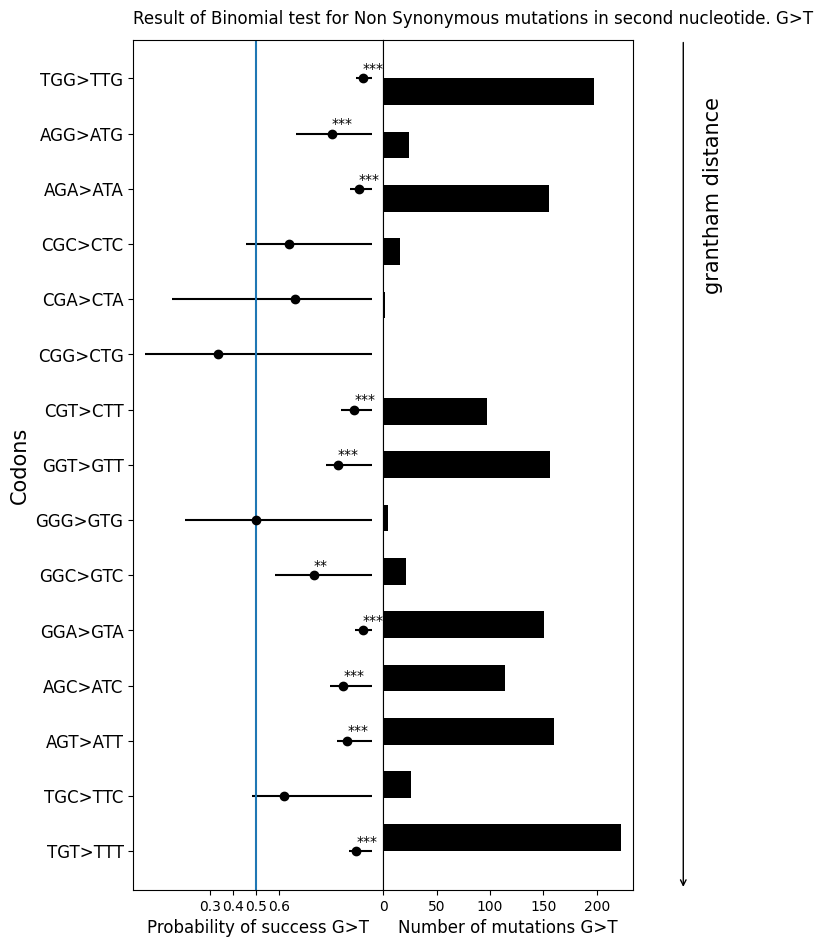

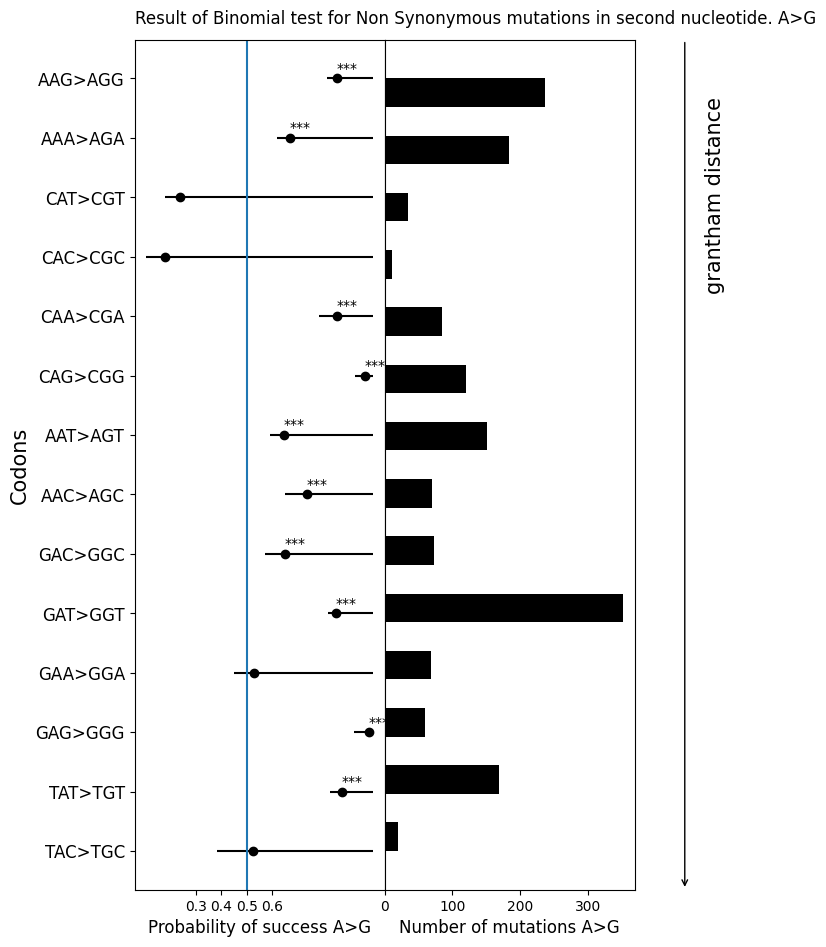

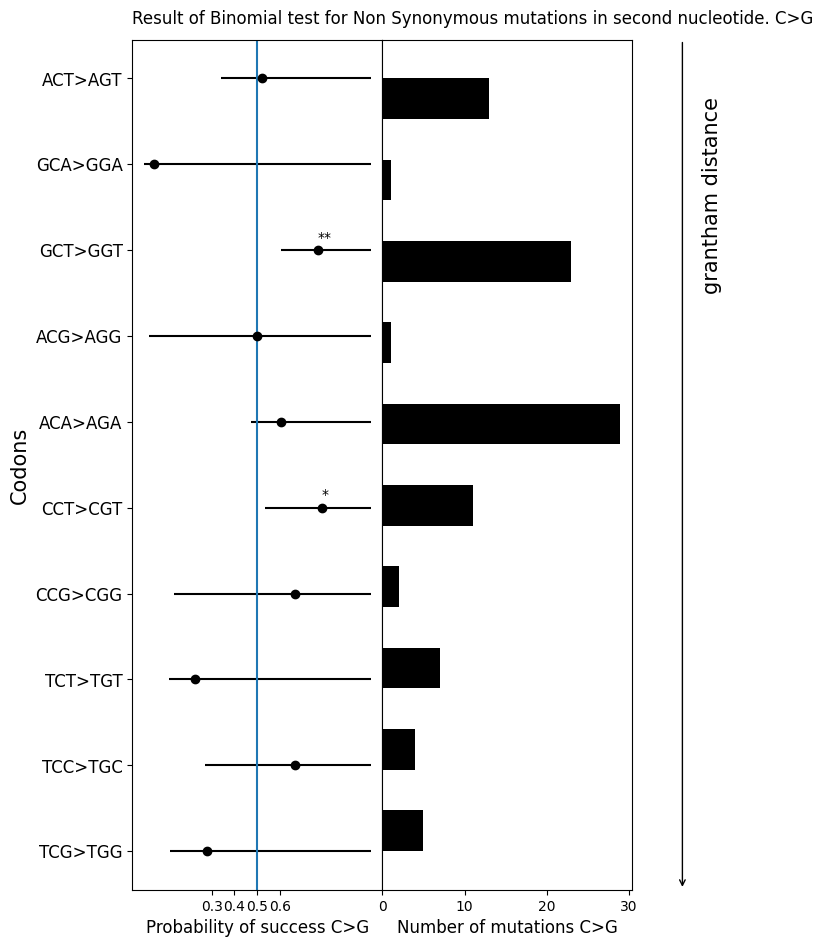

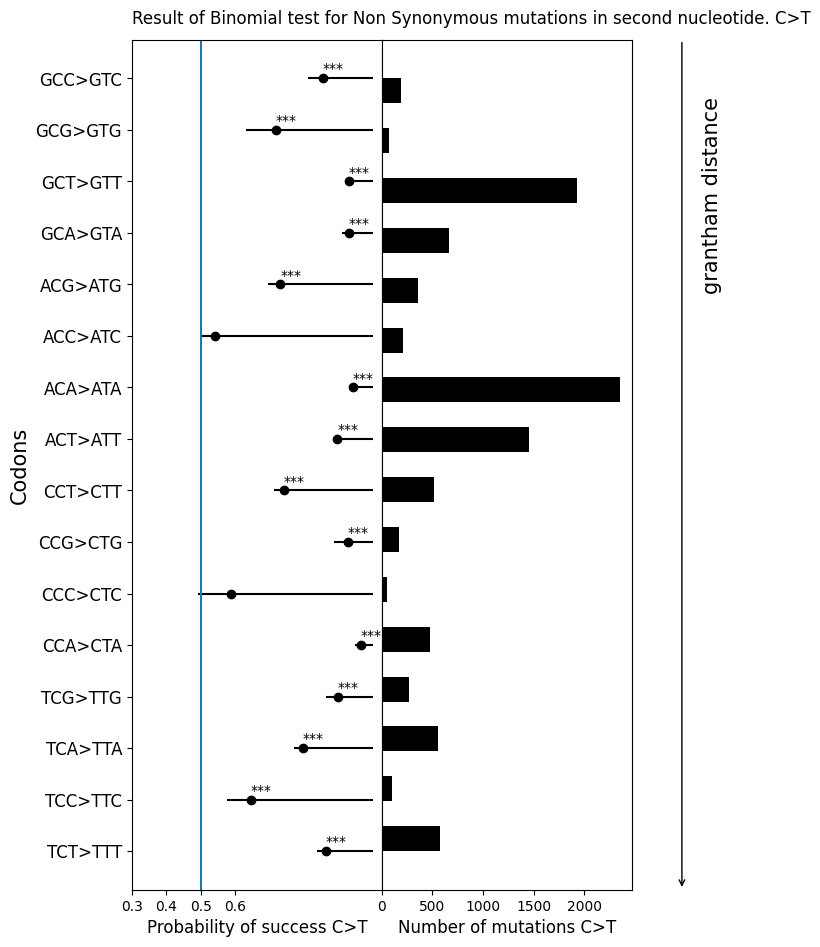

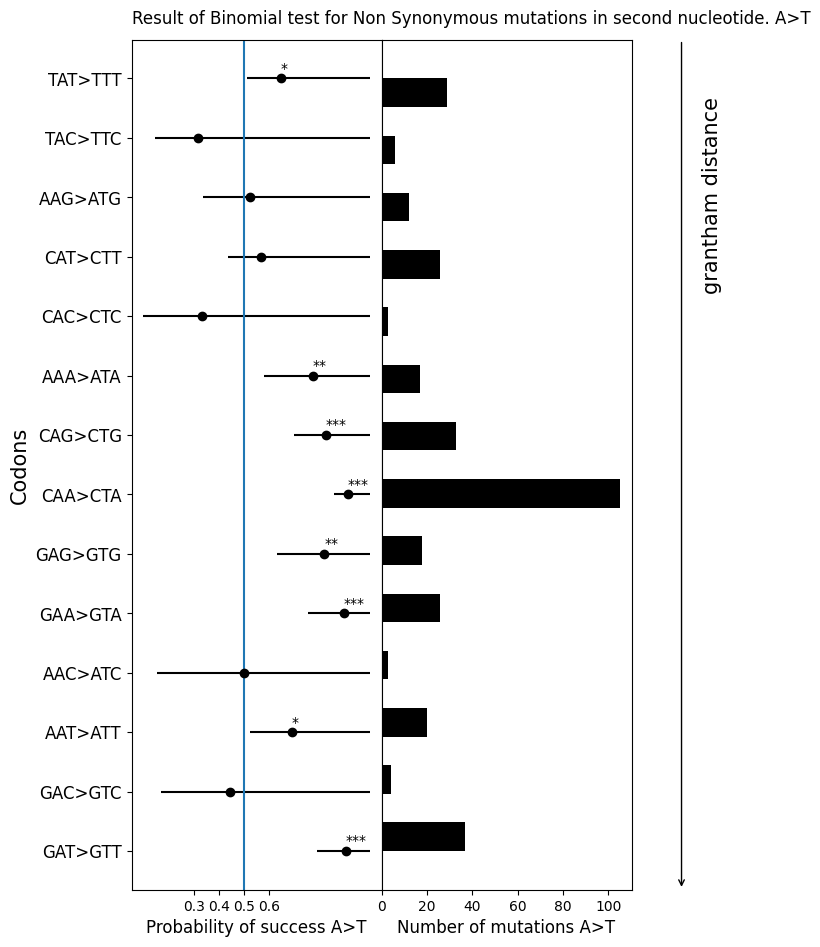

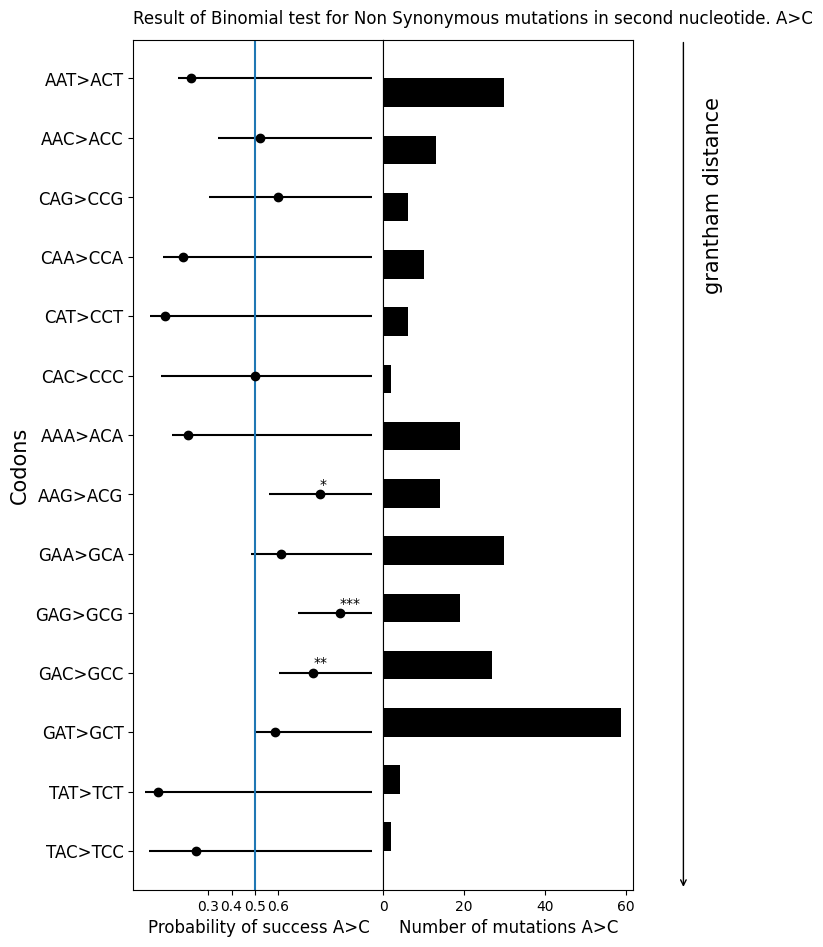

In [248]:
for mut in df_aa_mut['Mut'].unique():
    df_aa_mut_sub = df_aa_mut[df_aa_mut['Mut']==mut].reset_index(drop=True)
    fig, ax = plt.subplots(1,2,figsize=(10,10))
    min_error = list(df_aa_mut_sub['prob_success'] - df_aa_mut_sub['cilow'])
    max_error = list(df_aa_mut_sub['cihigh'] - df_aa_mut_sub['prob_success'])
    error = []
    for i in range(len(min_error)):
        error.append([min_error[i], max_error[i]])
    error = np.array(error)
    df_aa_mut_sub['color'] = ''
    df_aa_mut_sub.loc[df_aa_mut_sub['Mut']=='C>T', 'color'] = 'black'
    df_aa_mut_sub.loc[df_aa_mut_sub['Mut']=='G>T', 'color'] = 'black'
    df_aa_mut_sub.loc[~df_aa_mut_sub['Mut'].isin(['C>T', 'G>T']), 'color'] = 'black'

    for i in range(len(df_aa_mut_sub['color'])):
        er = ax[0].errorbar(df_aa_mut_sub['prob_success'][i], i, xerr=error[i].reshape(2, -1), marker="o", 
                            linestyle="none", color=df_aa_mut_sub['color'][i])

    ax[0].set_yticks(np.arange(len(df_aa_mut_sub['codon_Mut'])))
    ax[0].set_yticklabels(df_aa_mut_sub['codon_Mut'], fontsize=12)

    ax[0].set_xlabel('Probability of success '+mut, size=12)
    ax[0].set_ylabel('Codons', size=15)
    # ax.text(5.5,26, 'Odds_ratio with CI 95%')
    # ax.text(7,26, 'p_value')
    # ax.text(8,26, 'Aa status')

    i=0
    df_aa_mut_sub.loc[df_aa_mut_sub['aster'].isna(),'aster'] = ''
    for index, row in df_aa_mut_sub.iterrows():
        if df_aa_mut_sub['Mut'][index] == 'C>T':
            ax[0].text(df_aa_mut_sub['prob_success'][index]-0.001, i+0.1, df_aa_mut_sub['aster'][index], color='black')
        elif df_aa_mut_sub['Mut'][index] == 'G>T':
            ax[0].text(df_aa_mut_sub['prob_success'][index]-0.001, i+0.1, df_aa_mut_sub['aster'][index], color='black')
        else:
            ax[0].text(df_aa_mut_sub['prob_success'][index]-0.001, i+0.1, df_aa_mut_sub['aster'][index], color='black')
        i+=1

    ax[0].axvline(x=0.5)
    ax[0].get_xaxis().set_ticks([0.30, 0.40, 0.50, 0.60])

    ax[1].barh(y=df_aa_mut_sub['codon_Mut'], width=df_aa_mut_sub['Aa_Mut_count'], height = 0.5, color=df_aa_mut_sub['color'])
    ax[1].get_yaxis().set_ticks([])
    ax[1].set_xlabel('Number of mutations '+mut, size=12)
    plt.subplots_adjust(left=0.5,
                        bottom=0.1, 
                        right=1.0, 
                        top=0.95, 
                        wspace=0, 
                        hspace=0.4)
    fig.suptitle('Result of Binomial test for Non Synonymous mutations in second nucleotide. '+mut, horizontalalignment='left')
    ax[1].annotate('', xy=(1.2, 1), xycoords='axes fraction', xytext=(1.2, 0), 
                arrowprops=dict(arrowstyle="<-", color='black'))
    plt.text(1.07, 0.7, 'grantham distance', fontsize=15, rotation=90, transform=plt.gcf().transFigure)
    #plt.xlim(0, 160)
    plt.show()
    fig.savefig('../figures/binom_test_all_2nucincodon{}.pdf'.format(mut.replace(">", "_")), dpi=300, bbox_inches = 'tight')

In [126]:
ns_mut_df['counter'] = ns_mut_df.index
data = ns_mut_df[['Mut', 'counter']].groupby(['Mut'], as_index=False).count()

In [121]:
#n_mut = int(sum(data['counter']))
#max_mut = int(max(data['counter']))
#data['counter'] = data['counter']/n_mut

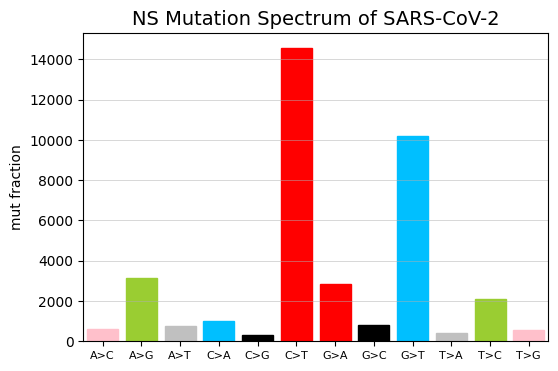

In [127]:
fig = plt.figure(figsize=(6, 4))
ax = sns.barplot(x="Mut", y='counter', data=data, order=sbs12_ordered, ax=fig.gca())
ax.grid(axis="y", alpha=.7, linewidth=0.5)
for bar, clr in zip(ax.patches, colors12):
    bar.set_color(clr)
ax.set_title('NS Mutation Spectrum of SARS-CoV-2', fontsize=14)
ax.set_xlabel("")
ax.set_ylabel("mut fraction")
plt.xticks(fontsize=8)
plt.show()
plt.close()